# Introduction to Itô Calculus and Itô Integrals

Classical calculus is built upon the notion of smooth functions and deterministic change. It provides powerful tools for analyzing systems where quantities evolve in a predictable, continuous manner. However, many phenomena in nature and financial markets are inherently random and exhibit irregular behavior that defies classical analysis. A central example of such randomness is *Brownian motion*, denoted by $W(t)$, which is continuous everywhere but differentiable nowhere, and whose sample paths exhibit infinite variation over any interval.

To study systems influenced by such randomness, we require a new mathematical framework. Itô calculus, developed by Kiyoshi Itô in the 1940s,**extends classical calculus to stochastic processes**, and in particular to Brownian motion. At the heart of this theory lies the Itô integral, which allows us to define integrals of the form

$$
\int_0^T \Lambda(t)\, dW(t),
$$

where $\Lambda(t)$ is an adapted stochastic process (possibly random and time-varying), and $W(t)$ is a Brownian motion.

The Itô integral differs fundamentally from ordinary integrals in several respects:

- The integrator $W(t)$ is not differentiable, so the usual definition of the integral via Riemann or Lebesgue techniques does not apply.
- The integral is constructed as a limit of discrete stochastic sums, in which the integrand is evaluated at the *left endpoints* of time intervals. This choice ensures the integral is well-defined for adapted processes and models realistic trading strategies in financial contexts.
- Because Brownian motion has nonzero **quadratic variation**, the rules of classical calculus (such as the chain rule) no longer hold in their usual form.

The Itô integral reflects the irregular and volatile nature of Brownian paths. Its definition avoids differentiating Brownian motion (which is impossible in the classical sense) and instead builds on summing stochastic increments—capturing both randomness and timing.

This departure from classical intuition gives rise to one of the most important results in stochastic calculus: the **Itô-Doeblin formula**, a stochastic generalization of the chain rule. For a twice differentiable function $f(x)$ and Brownian motion $W(t)$, it states:

$$
df(W(t)) = f'(W(t))\, dW(t) + \frac{1}{2} f''(W(t))\, dt,
$$

which highlights the appearance of a **correction term** involving the second derivative. This term arises due to the **accumulation of variance** from Brownian motion over infinitesimal intervals (a fact which we showed in the previous chapter).

Itô calculus is not merely a mathematical curiosity—it plays a central role in modeling in finance (e.g., the Black-Scholes-Merton model), physics (e.g., diffusion processes), and engineering (e.g., filtering theory). It enables us to formulate and solve stochastic differential equations (SDEs), in which randomness drives the evolution of systems over time.

In this chapter, we begin by carefully defining the Itô integral for simple (piecewise constant) integrands, then extend the construction to general stochastic processes. We examine key properties such as linearity, continuity, martingale behavior, and the Itô isometry. With these foundations, we develop the Itô-Doeblin formula, establishing the core of stochastic calculus and preparing the ground for applications in stochastic modeling and financial mathematics. Based on that, we then proceed with the definition of the Black-Scholes Merton formula

---

## Intuition of Itô's Integral as a trading strategy

To motivate the Itô integral, consider a financial interpretation:

Suppose you're an investor trading a risky asset whose price evolves randomly — modeled by a **Brownian motion W(t)**. You follow a trading strategy $\Lambda(t)$, which tells you how many shares you hold at each point in time. This strategy is defined once in each subinterval and remains constant in this interval. This position can change based on the past and present information, but not future prices — this makes $\Lamdba(t)$ an adapted process.

The total gain (or loss) from this trading activity up to time T is represented by the Itô integral:

$$
I(T) = \int^T_0 \Lambda(t)dW(t)
$$

where:

- $W(t)$ represent the (simplified) price of an asset evolving as a Brownian motion.
- $\Lambda(t)$ is the trading strategy and defines the number of shares held at time $t$.
- $dW(t)$ is the infinitesimal price movement (random).
- $\Lambda(t)dW(t)$ is the gain / loss from holding that position for a very short period.

In real trading, you adjust your portfolio at certain intervals. So first, we divide the trading horizon into discrete intervals using the partition $\prod = {t_0, t_1, ..., t_n}$. Importantly, we assume that the number of shares held ($\Lambda(t)$) is **constant on each subinterval t**. 

1. **From $t_0$ to $t_1$**:  
   The initial position is $\Lambda(t_0)$, and the asset price changes from $W(t_0)$ to $W(t)$. The gain is:

   $$
   I(t) = \Lambda(t_0) [W(t) - W(t_0)], \quad t_0 \leq t \leq t_1.
   $$

2. **From $t_1$ to $t_2$**:  
   At $t_1$, the trader **updates their position** to $\Lambda(t_1)$. The gain now includes both the previous gain and the new trading activity:

   $$
   I(t) = \Lambda(t_0) [W(t_1) - W(t_0)] + \Lambda(t_1) [W(t) - W(t_1)], \quad t_1 \leq t \leq t_2.
   $$

3. **From $t_2$ to $t_3$**:  
   At $t_2$, the trader **updates their position** again to $\Lambda(t_2)$. The total gain now becomes:

   $$
   I(t) = \Lambda(t_0) [W(t_1) - W(t_0)] + \Lambda(t_1) [W(t_2) - W(t_1)] + \Lambda(t_2) [W(t) - W(t_2)], \quad t_2 \leq t \leq t_3.
   $$

4. **Total Gain over time**

Once we add up all the gains across subintervals, we obtain:

$$
I(T) \approx \sum_{j=0}^{n-1} \Lambda(t_j)[W(t_{j+1}) - W(t_j)]
$$

This is exactly how Itô defined the integral for simple processes. As you let the trading intervals get finer, this sum converges to the Itô integral:

$$
I(T) = \int^T_0 \lambda(t)dW(t)
$$

In the sum above, you always evaluate $\Lambda(t_j)$ and not $\Lambda(t_{j+1})$ for one crucial reason: **You must decide your position before the asset price moves**. In finance, you can’t choose a trading position after seeing future prices. So your strategy must depend only on past and current information — that's what we mean by **adapted** filtration process such as a Brownian Motion. This is why Itô integrals use left-endpoints and why the Itô integral is realistic for modeling trading gains.

Considering everything, the trading strategy intuition provides a natural interpretation for the Itô integral. 

- We model cumulative gains from dynamically adjusting positions in an asset following Brownian motion. 
- At each trading time $t_j$, the position $\Lambda(t_j)$ is chosen based only on available information up to time $t_j$, and is held constant over the interval $[t_j, t_{j+1})$.
- This motivates the idea of **simple processes** — stochastic processes that are piecewise constant and adapted to the filtration generated by $W(t)$ (left-hand notion) - so they change throughout intervals but remain the same within. 
- Such processes accurately reflect how real-world strategies operate: traders can only act on current information, not on future prices.

--

## **Itô’s Integral for simple Integrands**

To define the Itô integral rigorously, we begin with a class of integrands known as **simple processes**. These are piecewise constant processes adapted to the filtration generated by Brownian motion.

### Definition of a simple process

Let $\Pi = \{t_0, t_1, \dots, t_n\}$ be a partition of the interval $[0, T]$. A process $\Lambda(t)$ is called a **simple (elementary) process** if it takes the form:

$$
\Lambda(t) = \sum_{j=0}^{n-1} \Lambda(t_j) \, \mathbf{1}_{[t_j, t_{j+1})}(t),
$$

where each $\Lambda(t_j)$ is $\mathcal{F}_{t_j}$-measurable, meaning it depends only on the information available up to time $t_j$. In particular, $\Lambda(t)$ is **adapted** to the filtration $(\mathcal{F}_t)_{t \geq 0}$.

This structure mirrors the trading strategy from the previous section: the position is chosen at time $t_j$ and held constant until the next trading date $t_{j+1}$.

### Definition of the Itô integral

Let $W(t)$ be a standard Brownian motion. For a simple process $\Lambda(t)$ as defined above, the **Itô integral** over $[0, T]$ is given by:

$$
\int_0^T \Lambda(t) \, dW(t) := \sum_{j=0}^{n-1} \Lambda(t_j) \, [W(t_{j+1}) - W(t_j)].
$$

This defines a stochastic process $I(T)$ representing the cumulative gain from trading using the simple strategy $\Lambda(t)$.

### Time-Dependent Version

More generally, we can define a process-valued version of the integral:

$$
I(t) = \int_0^t \Lambda(s) \, dW(s),
$$

which represents the gain accumulated up to any time $t \in [0, T]$. For each subinterval $[t_k, t_{k+1})$, the process satisfies:

$$
I(t) = \sum_{j=0}^{k-1} \Lambda(t_j)[W(t_{j+1}) - W(t_j)] + \Lambda(t_k)[W(t) - W(t_k)], \quad t \in [t_k, t_{k+1}).
$$

This formulation allows us to study the integral as a stochastic process in time.

---

### Properties of the Itô Integral

nce the Itô integral is defined for simple processes, we can analyze its most important properties. These not only distinguish it from classical integrals but also reveal its power in stochastic modeling.

#### Martingale Property

Let $\Lambda(t)$ be a simple, adapted process and $W(t)$ be a standard Brownian motion. Then the Itô integral

$$
I(t) = \int_0^t \Lambda(s) \, dW(s)
$$

is a **martingale** with respect to the filtration $(\mathcal{F}_t)$ generated by $W(t)$. That is,

$$
\mathbb{E}[I(t) \mid \mathcal{F}_s] = I(s), \quad \text{for all } 0 \leq s \leq t.
$$

This reflects the fact that the expected future gain from trading — given all information so far — is zero.

#### Itô Isometry

The Itô integral preserves the $L^2$ norm in a very elegant way:

$$
\mathbb{E} \left[ \left( \int_0^T \Lambda(t) \, dW(t) \right)^2 \right] = \mathbb{E} \left[ \int_0^T \Lambda^2(t) \, dt \right].
$$

This is known as the **Itô isometry**. It is crucial for:

- Proving convergence of approximations.
- Extending the integral to more general integrands.
- Analyzing variance and risk.

#### Quadratic Variation

Unlike ordinary integrals, the Itô integral has **nonzero quadratic variation**. Specifically:

$$
[I, I](T) = \int_0^T \Lambda^2(t) \, dt.
$$

This means the process $I(t)$ accumulates "roughness" over time depending on the square of the trading intensity $\Lambda(t)$. Quadratic variation is pathwise — it is computed for each realization of the Brownian path, not averaged like variance.

### Differential Form and Itô Multiplication Rule

In differential notation, the Itô integral is written:

$$
dI(t) = \Lambda(t) \, dW(t),
$$

and squaring both sides using Itô's rule gives:

$$
dI(t)^2 = \Lambda^2(t) \, dt.
$$

This confirms that **quadratic variation** accumulates at rate $\Lambda^2(t)$ per unit time — a key difference from classical integrals.

### Preliminary comparison to ordinary calculus

In classical calculus, integration relies on functions being smooth (differentiable). The Riemann integral computes area under a curve assuming well-behaved paths.

However, Brownian motion $W(t)$ is **nowhere differentiable**, and its paths have **infinite variation**. As a result:

- The Riemann–Stieltjes integral $\int_0^T \Lambda(t) \, dW(t)$ does **not exist** in general.
- The **usual chain rule fails**. For example, if $f(W(t)) = W^2(t)$, we do **not** have:
  $$
  df(W(t)) = 2W(t) \, dW(t).
  $$
  Instead, stochastic calculus gives:
  $$
  df(W(t)) = 2W(t) \, dW(t) + dt.
  $$

This additional $dt$ term arises from the **nonzero quadratic variation** of Brownian motion:
$$
[dW, dW] = dt.
$$

Such corrections are not needed in ordinary calculus — they are unique to the stochastic setting. In this way, the Itô integral lays the groundwork for a new calculus that respects the nature of random paths.

A more precise version of this comparison will follow once we introduce general integrands and the Itô–Doeblin formula.

### Visualization of the Ito Integral for simple integrands

Now that we rigorously defined the Ito Integral for simple integrands, we can visualize it. 

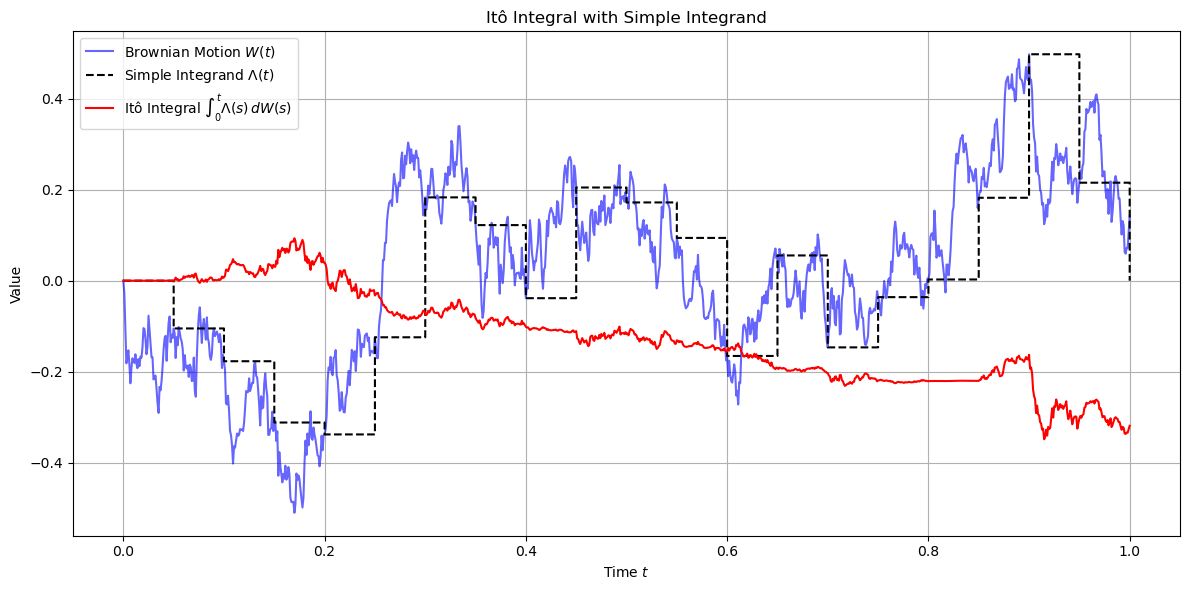

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0            # Total time
N = 1000           # Number of time steps
dt = T / N         # Time increment
t = np.linspace(0, T, N + 1)  # Time grid

# Simulate Brownian motion
dW = np.random.normal(0, np.sqrt(dt), size=N)  # Brownian increments
W = np.concatenate(([0], np.cumsum(dW)))       # Brownian path

# Define a simple integrand: stepwise constant
partition_size = 50  # how many steps per constant interval
Lambda_simple = np.zeros_like(t)
for j in range(0, N, partition_size):
    Lambda_simple[j:j + partition_size] = W[j]  # use W(t_j) as value on [t_j, t_{j+1})

# Compute Itô integral: sum of Λ(t_j) * ΔW_j
Ito_integral = np.cumsum(Lambda_simple[:-1] * dW)
Ito_integral = np.concatenate(([0], Ito_integral))  # start from 0

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t, W, label=r"Brownian Motion $W(t)$", color='blue', alpha=0.6)
plt.step(t, Lambda_simple, where='post', label=r"Simple Integrand $\Lambda(t)$", color='black', linestyle='--')
plt.plot(t, Ito_integral, label=r"Itô Integral $\int_0^t \Lambda(s)\, dW(s)$", color='red')
plt.xlabel("Time $t$")
plt.ylabel("Value")
plt.title("Itô Integral with Simple Integrand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This Python script simulates the **Itô integral**:

$$
I(T) = \int_0^T \Lambda(t) dW(t)
$$

where:
- $W(t)$ is a **Brownian motion** (Wiener process).
- $\Lambda(t)$ is a **stochastic process** (piecewise constant).
- The integral is approximated using a **discrete sum**.

We do the following:

#### Simulation of the Brownian Motion:

This code simulates a brownian motion:

```python
dW = np.random.normal(0, np.sqrt(dt), size=N)  # Brownian increments
W = np.concatenate(([0], np.cumsum(dW)))       # Brownian path
```

where:

 - $dW \sim \mathcal{N}(0, \sqrt{dt})$: Generates Brownian motion increments using a normal distribution with Mean 0 (centered at zero) and the Standard deviation $\sqrt{dt}$ (scaling for continuous-time behavior).
 - $W(t)$: The Brownian path is computed as the cumulative sum of these increments.

This follows the discretization of Brownian motion:

- $W(t_{j+1}) = W(t_j) + dW_j$

#### Define the process $\Lambda$

This code defines the process $\Lambda$:

```python
Lambda_simple[j:j + partition_size] = W[j]
```

We define $\Lambda(t)$ to be piecewise constant, using the Brownian value at the start of each interval:

$$
\Lambda(t) = W(t_j)
$$

This reflects a trading strategy that holds a constant position during each interval.

#### Computing the Ito Integral approximation

This code computes the Ito integral approximation:

```python
Ito_integral = np.cumsum(Lambda[:-1] * dW)  # Sum of Λ(t) * dW
Ito_integral = np.concatenate(([0], Ito_integral))  # Start at zero
```

Where we compute the Ito integral approximation as:

$$
I(t) = \sum_{j=0}^{n-1}\Lambda(t_j)[W(t_{j+1}) - W(t_j)]
$$

which is exactly the discrete Itô integral for simple (stepwise constant) $\Lambda(t)$.

So far, we’ve developed the Itô integral for **simple integrands**, where $\Lambda(t)$ is a **step function**, piecewise-constant over intervals $[t_j, t_{j+1})$. 

This construction reflects discrete-time trading strategies, where positions are updated only at fixed times.

In reality, most stochastic processes **are not piecewise constant**. Instead, strategies may:
- **Vary continuously** (e.g., $\Lambda(t) = \sin(t)$).
- **Have unpredictable jumps** (e.g., processes with sudden price changes).

We therefore want to extend the Itô integral to **more general integrands**: stochastic processes $\Lambda(t)$ that are **not necessarily simple**, but possibly **continuous**, **càdlàg**, or even involve jumps.

To do so, we treat the simple integrals as **building blocks** and define the general integral as a **limit** of integrals with simple approximations.

## Ito's Integral for general integrands

###  **Key Conditions for Itô Integration**

To ensure mathematical well-posedness, $\Lambda(t)$ must satisfy:
1. **Adaptivity**: $\Lambda(t)$ must be **$\mathcal{F}(t)$-measurable**, meaning it only depends on past information.
2. **Square-Integrability**: The integral must satisfy the **finite variance condition**:
   $$
   \mathbb{E} \int_0^T \Lambda^2(t) dt < \infty.
   $$

### **Approximating General Integrands**

To rigorously define the Itô integral for a general stochastic process $\Lambda(t)$, we proceed by **approximating** it through a sequence of **simple processes**.

#### Partition the Time Interval

Let $\Pi_n = \{0 = t_0 < t_1 < \dots < t_n = T\}$ be a partition of $[0, T]$.

#### Build Stepwise Constant Approximations

For each $n$, we construct a **simple (stepwise constant) process** $\Lambda_n(t)$ that approximates $\Lambda(t)$ by:

$$
\Lambda_n(t) := \Lambda(t_j), \quad \text{for } t_j \leq t < t_{j+1}.
$$

In other words, $\Lambda_n(t)$ holds the value of $\Lambda(t)$ at the **left endpoint** of each subinterval, just like in the simple integrand case.

#### Take the Limit

As the partition becomes finer (i.e. $\max_j |t_{j+1} - t_j| \to 0$), the approximating sequence converges to the true process $\Lambda(t)$ in the mean-square sense:

$$
\lim_{n \to \infty} \mathbb{E} \left[ \int_0^T (\Lambda_n(t) - \Lambda(t))^2\, dt \right] = 0.
$$

#### Final Definition

We now define the Itô integral for general integrands as the **$L^2$ limit** of the Itô integrals for the simple approximations:

$$
\int_0^T \Lambda(t)\, dW(t) := \lim_{n \to \infty} \int_0^T \Lambda_n(t)\, dW(t).
$$

**Remark (On $L^2$ Convergence):**  
When we define the Itô integral for general integrands, we use a limit in the **$L^2$ sense**. That is, the simple process approximations $\Lambda_n(t)$ satisfy:

$$
\mathbb{E} \left[ \int_0^T (\Lambda_n(t) - \Lambda(t))^2 dt \right] \to 0.
$$

This ensures that the integrals $\int_0^T \Lambda_n(t)\, dW(t)$ converge in mean square to the true Itô integral. This type of convergence fits naturally with tools like the Itô isometry.

### **Properties of the Itô Integral for General Integrands**

The Itô integral $I(t) = \int_0^t \Lambda(u) dW(u)$ satisfies:

1. **(Continuity)**: The paths of $I(t)$ are **continuous**.
2. **(Adaptivity)**: $I(t)$ is **$\mathcal{F}(t)$-measurable**.
3. **(Linearity)**: If $I(t) = \int_0^t \Lambda(u) dW(u)$ and $J(t) = \int_0^t F(u) dW(u)$, then:
   $$
   I(t) \pm J(t) = \int_0^t (\Lambda(u) \pm F(u)) dW(u), \quad cI(t) = \int_0^t c\Lambda(u) dW(u).
   $$
4. **(Martingale Property)**: $I(t)$ is a **martingale**.
5. **(Itô Isometry)**: The second moment is given by:
   $$
   \mathbb{E} I^2(t) = \mathbb{E} \int_0^t \Lambda^2(u) du.
   $$
6. **(Quadratic Variation)**: The quadratic variation process is:
   $$
   [I, I](t) = \int_0^t \Lambda^2(u) du.
   $$

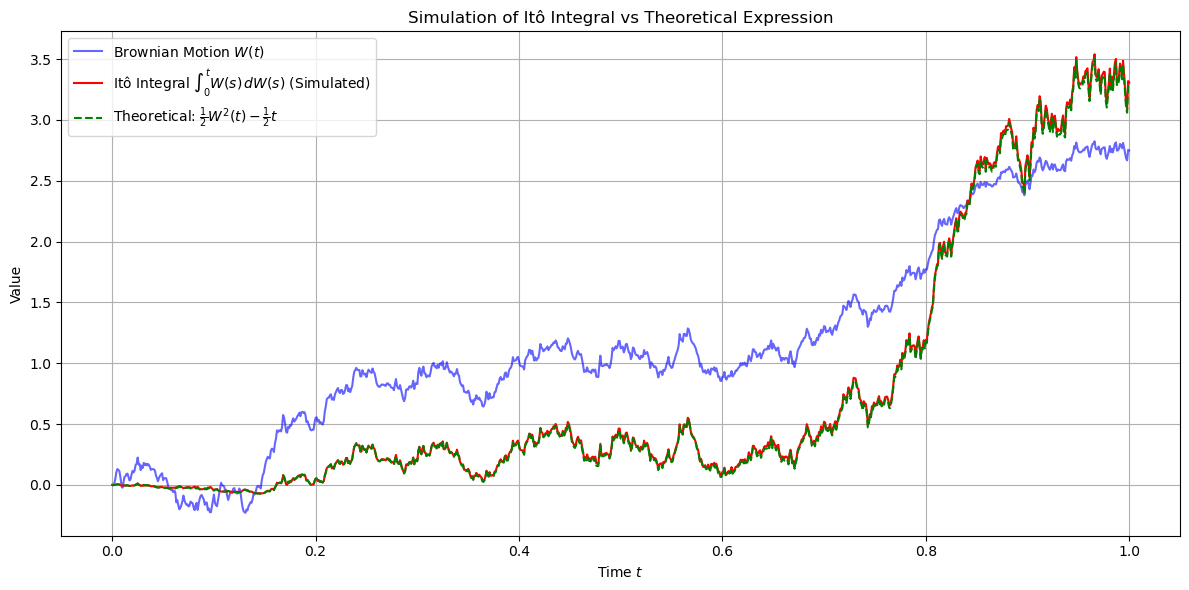

### Comparison with Ordinary Calculus

#### What Happens in Deterministic Calculus

In ordinary calculus, if $g(t)$ is differentiable, we have:
$$
\int_0^T g(t)\,dg(t) = \frac{1}{2} g^2(T).
$$

This follows from the **chain rule** and integration by parts.

#### What Changes in Stochastic Calculus?

In Itô calculus, even though $W(t)$ is continuous, it is *nowhere differentiable* and accumulates **quadratic variation**:

$$
[W, W](T) = T.
$$

So, for the same-looking integral:
$$
\int_0^T W(t)\,dW(t),
$$
we now get:
$$
\int_0^T W(t)\,dW(t) = \frac{1}{2}W^2(T) - \frac{1}{2}T.
$$

This extra term $-\frac{1}{2}T$ is the result of **nonzero quadratic variation** and the way we define Itô integrals using **left-endpoint evaluation**.

### Why This Matters

This correction makes all the difference when working with stochastic models. Without it, we'd misprice derivatives, misunderstand volatility, and misuse standard calculus rules.

We'll formalize this contrast using the **Itô–Doeblin formula** in the next section.

### **Example: Computing $\int_0^T W(t) dW(t)$**


#### **1. Goal**
We aim to compute the Itô integral:

$$
I(T) = \int_0^T W(t) dW(t),
$$

where $W(t)$ is a **standard Brownian motion**.

Since Brownian motion is **not differentiable**, we approximate this integral using **simple processes** and take the limit.

---

#### **2. Stepwise Approximation of $W(t)$**

To rigorously define the integral, we approximate $W(t)$ by a **piecewise constant function**.

##### **2.1. Partitioning the Interval**

- Divide $[0,T]$ into **$n$ equal subintervals**:
  
  $$
  0 = t_0 < t_1 < t_2 < \dots < t_n = T,
  $$
  
  where:

  $$
  t_j = \frac{jT}{n}, \quad j = 0, 1, \dots, n.
  $$

- Define a **stepwise approximation** of $W(t)$, denoted by $\Lambda_n(t)$:

  $$
  \Lambda_n(t) =
  \begin{cases} 
    W(0) = 0, & 0 \leq t < \frac{T}{n}, \\ 
    W\left(\frac{kT}{n}\right), & \frac{kT}{n} \leq t < \frac{(k+1)T}{n}.
  \end{cases}
  $$

Thus, $\Lambda_n(t)$ is **piecewise constant**, meaning that it takes the value of **$W(t)$ at the left endpoint of each subinterval**.

---

#### **3. Approximating the Integral as a Sum**
For each partition, we approximate the integral as:

$$
I_n(T) = \sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)].
$$

#### **Interpretation:**
- **$W(t_j)$** is the **left-endpoint value** of the Brownian motion in subinterval $[t_j, t_{j+1}]$.
- **$[W(t_{j+1}) - W(t_j)]$** represents the **increment** over that interval.
- **Summing these products** gives an approximation to the Itô integral.

---

#### **4. Expanding the Itô Integral Using Quadratic Variation**

We want to compute the sum:

$$
I_n(T) = \sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)],
$$

which approximates the Itô integral:

$$
I(T) = \int_0^T W(t) dW(t).
$$

Since **Brownian motion is not differentiable**, we use an **algebraic identity** to simplify this sum and analyze its limit as $n \to \infty$.

##### **Step 1: Expanding the Product $W(t_j) W(t_{j+1})$**

Using the **identity for expanding products**, we write:

$$
W(t_j) W(t_{j+1}) = \frac{1}{2} \left(W^2(t_{j+1}) + W^2(t_j) - (W(t_{j+1}) - W(t_j))^2\right).
$$

Rearranging this equation, we get:

$$
W(t_j) W(t_{j+1}) - W^2(t_j) = \frac{1}{2} \left(W^2(t_{j+1}) - W^2(t_j) - (W(t_{j+1}) - W(t_j))^2\right).
$$

Multiplying both sides by $W(t_j)$ and simplifying:

$$
W(t_j) [W(t_{j+1}) - W(t_j)] = \frac{1}{2} [W^2(t_{j+1}) - W^2(t_j)] - \frac{1}{2} (W(t_{j+1}) - W(t_j))^2.
$$

This expresses the **incremental contribution** to the sum in terms of squared values of Brownian motion.

##### **Step 2: Summing Over All j**
Now, summing both sides over all time steps \( j = 0, ..., n-1 \):

$$
\sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)]
$$

Substituting our expansion from **Step 1**:

$$
\sum_{j=0}^{n-1} \left( \frac{1}{2} [W^2(t_{j+1}) - W^2(t_j)] - \frac{1}{2} (W(t_{j+1}) - W(t_j))^2 \right).
$$

Since the **terms $W^2(t_j)$ telescope**, this simplifies to:

$$
\frac{1}{2} [W^2(T) - W^2(0)] - \frac{1}{2} \sum_{j=0}^{n-1} (W(t_{j+1}) - W(t_j))^2.
$$

Since W(0) = 0, we obtain:

$$
I_n(T) = \frac{1}{2} W^2(T) - \frac{1}{2} \sum_{j=0}^{n-1} (W(t_{j+1}) - W(t_j))^2.
$$

##### **Step 3: Understanding the Quadratic Variation Term**

The remaining sum,

$$
\sum_{j=0}^{n-1} (W(t_{j+1}) - W(t_j))^2,
$$

is a **discrete approximation of the quadratic variation of Brownian motion**, which satisfies:

$$
\sum_{j=0}^{n-1} (W(t_{j+1}) - W(t_j))^2 \approx T.
$$

Thus, in the **limit as $n \to \infty$**, we obtain:

$$
\int_0^T W(t) dW(t) = \frac{1}{2} W^2(T) - \frac{1}{2} T.
$$

---

#### **5. Understanding the Extra Term $-\frac{1}{2}T$**
##### **(a) Why This Doesn't Happen in Ordinary Calculus**
For a differentiable function $g(t)$, integration by parts gives:

$$
\int_0^T g(t) dg(t) = \frac{1}{2} g^2(T).
$$

This works because **in ordinary calculus, the squared increments vanish** as step sizes shrink:

$$
\sum_{j} (g(t_{j+1}) - g(t_j))^2 \to 0.
$$

However, **for Brownian motion**:

$$
\sum_{j} (W(t_{j+1}) - W(t_j))^2 \to T.
$$

This is the fundamental difference: **Brownian motion accumulates quadratic variation at a rate of $dt$**, while a differentiable function does not.

##### **(b) Why Itô Integration Uses Left-End Evaluation**
In the Itô integral:

$$
I(T) = \lim_{n \to \infty} \sum_{j=0}^{n-1} W(t_j) [W(t_{j+1}) - W(t_j)],
$$

the function $W(t_j)$ is evaluated **at the left endpoint**. This is crucial because:
- It ensures **adaptedness** (we cannot use future information).
- It causes **correlation between $W(t_j)$ and the increment $[W(t_{j+1}) - W(t_j)]$**.

If we instead evaluated at **midpoints** (as in the **Stratonovich integral**), the correction term would disappear, and the result would match ordinary calculus.

---

#### **6. Comparing Itô and Stratonovich Integrals**
A key distinction in stochastic calculus is between:
- The **Itô integral** $\int_0^T W(t) dW(t)$ (evaluates at the left endpoint).
- The **Stratonovich integral** $\int_0^T W(t) \circ dW(t)$ (evaluates at the midpoint).

If we had used **midpoints** instead of left-endpoints, the extra term would disappear:

$$
\int_0^T W(t) \circ dW(t) = \frac{1}{2} W^2(T).
$$

Thus, **the choice of evaluation point affects the integral’s result**.

---

#### **7. Summary: Why the Additional Term Appears**
1. **Brownian motion has nonzero quadratic variation**:
   - Unlike smooth functions, it satisfies:
     $$
     [W, W](T) = T.
     $$

2. **The Itô integral accumulates a correction term due to quadratic variation**:
   - When summing discrete increments:
     $$
     W(t_j) [W(t_{j+1}) - W(t_j)] = \frac{1}{2} [W^2(t_{j+1}) - W^2(t_j)] - \frac{1}{2} (W(t_{j+1}) - W(t_j))^2.
     $$
   - The second term contributes **$-\frac{1}{2}T$**.

3. **Itô vs. Stratonovich Integration**:
   - The Itô integral evaluates at **left endpoints** (causing the correction).
   - The Stratonovich integral evaluates at **midpoints**, avoiding the correction.

4. **Final Result**:
   - For a differentiable function: $\int_0^T g(t) dg(t) = \frac{1}{2} g^2(T)$.
   - For Brownian motion: $\int_0^T W(t) dW(t) = \frac{1}{2} W^2(T) - \frac{1}{2} T$.



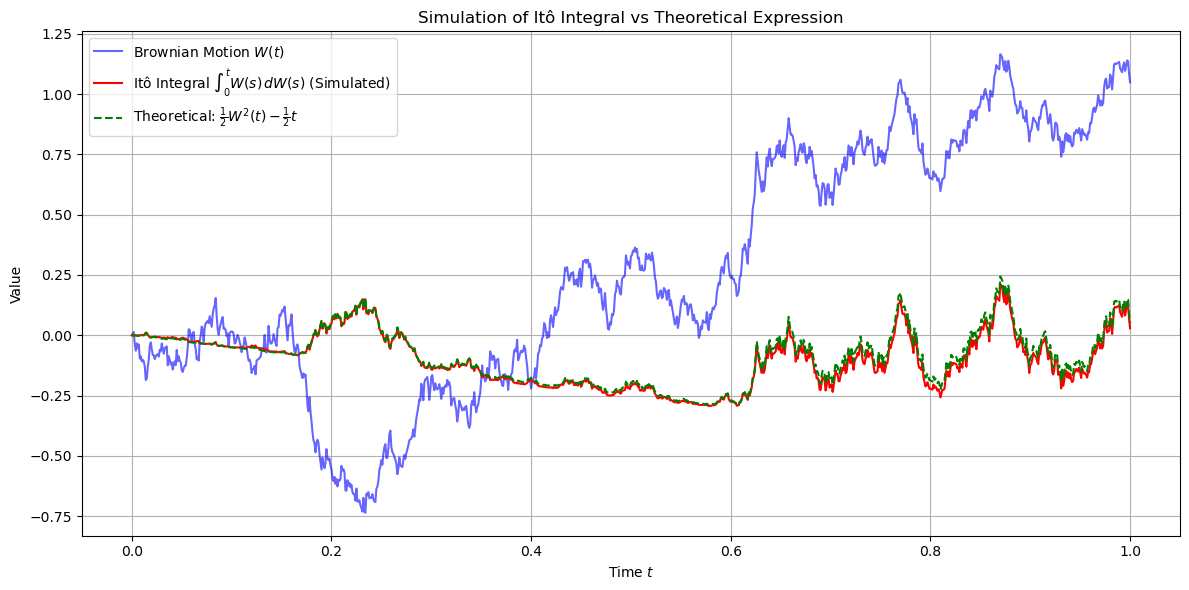

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0               # Time horizon
N = 1000              # Number of time steps
dt = T / N            # Time step size
t = np.linspace(0, T, N + 1)  # Time grid

# Simulate Brownian motion
dW = np.random.normal(0, np.sqrt(dt), size=N)   # Brownian increments
W = np.concatenate(([0], np.cumsum(dW)))        # Brownian path

# Compute the Itô integral approximation: sum W(t_j) * dW_j
Ito_integral = np.cumsum(W[:-1] * dW)           # Left-endpoint approximation
Ito_integral = np.concatenate(([0], Ito_integral))

# Theoretical result from Itô's formula: (1/2) W(t)^2 - (1/2) t
Ito_formula = 0.5 * W**2 - 0.5 * t

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, W, label=r"Brownian Motion $W(t)$", color='blue', alpha=0.6)
plt.plot(t, Ito_integral, label=r"Itô Integral $\int_0^t W(s)\,dW(s)$ (Simulated)", color='red')
plt.plot(t, Ito_formula, label=r"Theoretical: $\frac{1}{2}W^2(t) - \frac{1}{2}t$", color='green', linestyle='dashed')
plt.xlabel("Time $t$")
plt.ylabel("Value")
plt.title("Simulation of Itô Integral vs Theoretical Expression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **Itô-Doeblin Formula: Connecting Itô Integration to Stochastic Differentiation**

The **Itô-Doeblin formula** extends **Itô integration** by generalizing the **chain rule** to functions of stochastic processes. In ordinary calculus, if a function f(x) depends on a variable x, we differentiate using:

$$
\frac{d}{dx} f(x) = f'(x).
$$

However, when x is **a Brownian motion** W(t), standard differentiation **fails** because W(t) has **nonzero quadratic variation**. The correct formula **modifies the chain rule** to include an additional term.

---

### **1. Itô-Doeblin Formula for Brownian Motion**
For a **differentiable function** f(W(t)), the standard chain rule suggests:

$$
df(W(t)) = f'(W(t)) dW(t).
$$

However, due to **the quadratic variation property** of Brownian motion:

$$
dW(t) dW(t) = dt,
$$

the correct form of the **Itô-Doeblin formula** is:

$$
df(W(t)) = f'(W(t)) dW(t) + \frac{1}{2} f''(W(t)) dt.
$$

**Integral Form:** Integrating both sides from 0 to T, we get:

$$
f(W(T)) - f(W(0)) = \int_0^T f'(W(u)) dW(u) + \frac{1}{2} \int_0^T f''(W(u)) du.
$$

This formula **directly connects to Itô integration**:
- The first term is an **Itô integral**, introduced earlier.
- The second term is a **standard integral** with respect to time.

This additional term **does not appear in ordinary calculus** because Brownian motion has **nonzero quadratic variation**, unlike smooth functions.

---

### **2. Itô-Doeblin Formula for Functions of Time and Brownian Motion**
Now, let’s generalize to functions of both **time and Brownian motion**, i.e., f(t, W(t)). Applying Taylor expansion, we get:

$$
df(t, W(t)) = f_t(t, W(t)) dt + f_x(t, W(t)) dW(t) + \frac{1}{2} f_{xx}(t, W(t)) dW(t) dW(t).
$$

Using the **quadratic variation property** $dW(t) dW(t) = dt$, we simplify:

$$
df(t, W(t)) = f_t(t, W(t)) dt + f_x(t, W(t)) dW(t) + \frac{1}{2} f_{xx}(t, W(t)) dt.
$$

#### **Integral Form:**
By integrating from 0 to T, we obtain:

$$
f(T, W(T)) = f(0, W(0)) + \int_0^T f_t(t, W(t)) dt + \int_0^T f_x(t, W(t)) dW(t) + \frac{1}{2} \int_0^T f_{xx}(t, W(t)) dt.
$$

This formula shows that **stochastic differentiation includes an extra term** due to **quadratic variation**.

---

### **3. Example: Itô-Doeblin Formula for $f(W) = \frac{1}{2} W^2$**

To understand why the extra term appears, consider:

$$
f(W) = \frac{1}{2} W^2.
$$

Then:

- $f'(W) = W$,
- $f''(W) = 1$.

Applying Itô’s formula:

$$
d \left(\frac{1}{2} W^2 \right) = W dW + \frac{1}{2} (1) dt.
$$

Integrating:

$$
\frac{1}{2} W^2(T) - \frac{1}{2} W^2(0) = \int_0^T W(t) dW(t) + \frac{1}{2} \int_0^T dt.
$$

Since W(0) = 0, we obtain:

$$
\int_0^T W(t) dW(t) = \frac{1}{2} W^2(T) - \frac{1}{2} T.
$$

This confirms the **additional correction term** $-\frac{1}{2}T$ that we derived earlier using the **quadratic variation of Brownian motion**.

---

### **4. Generalizing to Itô Processes**
Most stochastic processes in finance are **not pure Brownian motions** but follow the more general **Itô process**:

$$
dX(t) = \Lambda(t) dW(t) + \Theta(t) dt.
$$

Applying Itô-Doeblin's formula to a function \( f(t, X(t)) \), we obtain:

$$
df(t, X(t)) = f_t(t, X(t)) dt + f_x(t, X(t)) dX(t) + \frac{1}{2} f_{xx}(t, X(t)) dX(t) dX(t).
$$

Since the quadratic variation of \( X(t) \) is:

$$
dX(t) dX(t) = \Lambda^2(t) dt,
$$

we substitute:

$$
df(t, X(t)) = f_t(t, X(t)) dt + f_x(t, X(t)) (\Lambda(t) dW(t) + \Theta(t) dt) + \frac{1}{2} f_{xx}(t, X(t)) \Lambda^2(t) dt.
$$

Rearranging:

$$
df(t, X(t)) = \left[ f_t(t, X(t)) + \Theta(t) f_x(t, X(t)) + \frac{1}{2} \Lambda^2(t) f_{xx}(t, X(t)) \right] dt + f_x(t, X(t)) \Lambda(t) dW(t).
$$

#### **Integral Form:**
By integrating over time, we obtain:

$$
f(T, X(T)) = f(0, X(0)) + \int_0^T f_t(t, X(t)) dt + \int_0^T f_x(t, X(t)) dX(t) + \frac{1}{2} \int_0^T f_{xx}(t, X(t)) d[X, X](t).
$$

---

### **5. Why This is Crucial for the Black-Scholes Formula**
The **Black-Scholes equation** models the price \( S(t) \) of an asset as:

$$
dS = \mu S dt + \sigma S dW.
$$

Applying the **Itô-Doeblin formula** to a function \( V(S, t) \) (the option price), we get:

$$
dV = \left( V_t + \mu S V_S + \frac{1}{2} \sigma^2 S^2 V_{SS} \right) dt + \sigma S V_S dW.
$$

The key insight in **Black-Scholes theory** is to eliminate the randomness by constructing a **risk-free portfolio**. This relies entirely on Itô-Doeblin's formula.

---

### **6. Summary: The Role of Itô-Doeblin’s Formula**
| **Feature** | **Itô Integral** | **Itô-Doeblin Formula** |
|------------|-----------------|-------------------------|
| **Purpose** | Defines integration with respect to Brownian motion. | Extends chain rule to stochastic processes. |
| **Main Idea** | $ I(T) = \int_0^T \Lambda(t) dW(t) $ | $ df = f_t dt + f_x dW + \frac{1}{2} f_{xx} dt $ |
| **Why It Matters** | Used to compute stochastic integrals. | Essential for deriving Black-Scholes. |
| **Key Extra Term** | None | $\frac{1}{2} f_{xx} dt$ due to quadratic variation. |

#### **Key Takeaways:**
✔ **Itô-Doeblin's formula generalizes the chain rule for stochastic processes.**  
✔ **The extra term accounts for the nonzero quadratic variation of Brownian motion.**  
✔ **This formula is the foundation for deriving the Black-Scholes equation.**  

**Next Step:** Now that we understand Itô-Doeblin’s formula, we can **apply it to option pricing and derive the Black-Scholes equation!**
